<h1>Install the ucimlrepo library<h1>

In [ ]:
!pip install ucimlrepo

<h1>Import Required Libraries<h1>

In [ ]:
import numpy as np  # For numerical and matrix operations
import pandas as pd  # For handling datasets using DataFrame structures
from ucimlrepo import fetch_ucirepo  # To fetch datasets from the UCI Machine Learning Repository
from sklearn.preprocessing import StandardScaler  # For feature normalization (standardization)
from sklearn.decomposition import PCA  # For dimensionality reduction using Principal Component Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # For Linear Discriminant Analysis (supervised dimensionality reduction)
from sklearn.cluster import KMeans, AgglomerativeClustering  # Clustering algorithms: K-Means and Hierarchical (Agglomerative) Clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering performance using the Silhouette Score
import matplotlib.pyplot as plt  # For data visualization and plotting
from scipy.cluster.hierarchy import dendrogram, linkage  # For hierarchical clustering and generating dendrogram plots

<h1>Load Ionosphere Dataset<h1>

In [ ]:
# Load the Ionosphere dataset from the UCI Machine Learning Repository
data = fetch_ucirepo(id=52)  # Fetch dataset with ID 52 (Ionosphere dataset)

# Extract feature matrix (X) and target labels (y)
X = data.data.features  # Features (input variables)
y = data.data.targets   # Targets or class labels

# Convert target 'y' to a Series if it's a DataFrame
# (some UCI datasets return targets in DataFrame format with one column)
if isinstance(y, pd.DataFrame): 
    y = y.iloc[:, 0]  

# --- Inspect dataset structure ---
print("Shape of features:", X.shape)   # Display the shape of the feature matrix (rows, columns)
print("Target classes:", y.unique())   # Display unique target classes (labels) in the dataset


Shape of features: (351, 34)
Target classes: ['g' 'b']


<h1>Data Normalization<h1>

In [ ]:
# Normalize features using StandardScaler
scaler = StandardScaler()        # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Fit to the data and transform it to a normalized form

<h1>Principal Component Analysis (PCA)<h1>
<h5>Perform PCA for dimensionality reduction and visualize explained variance.<h5>

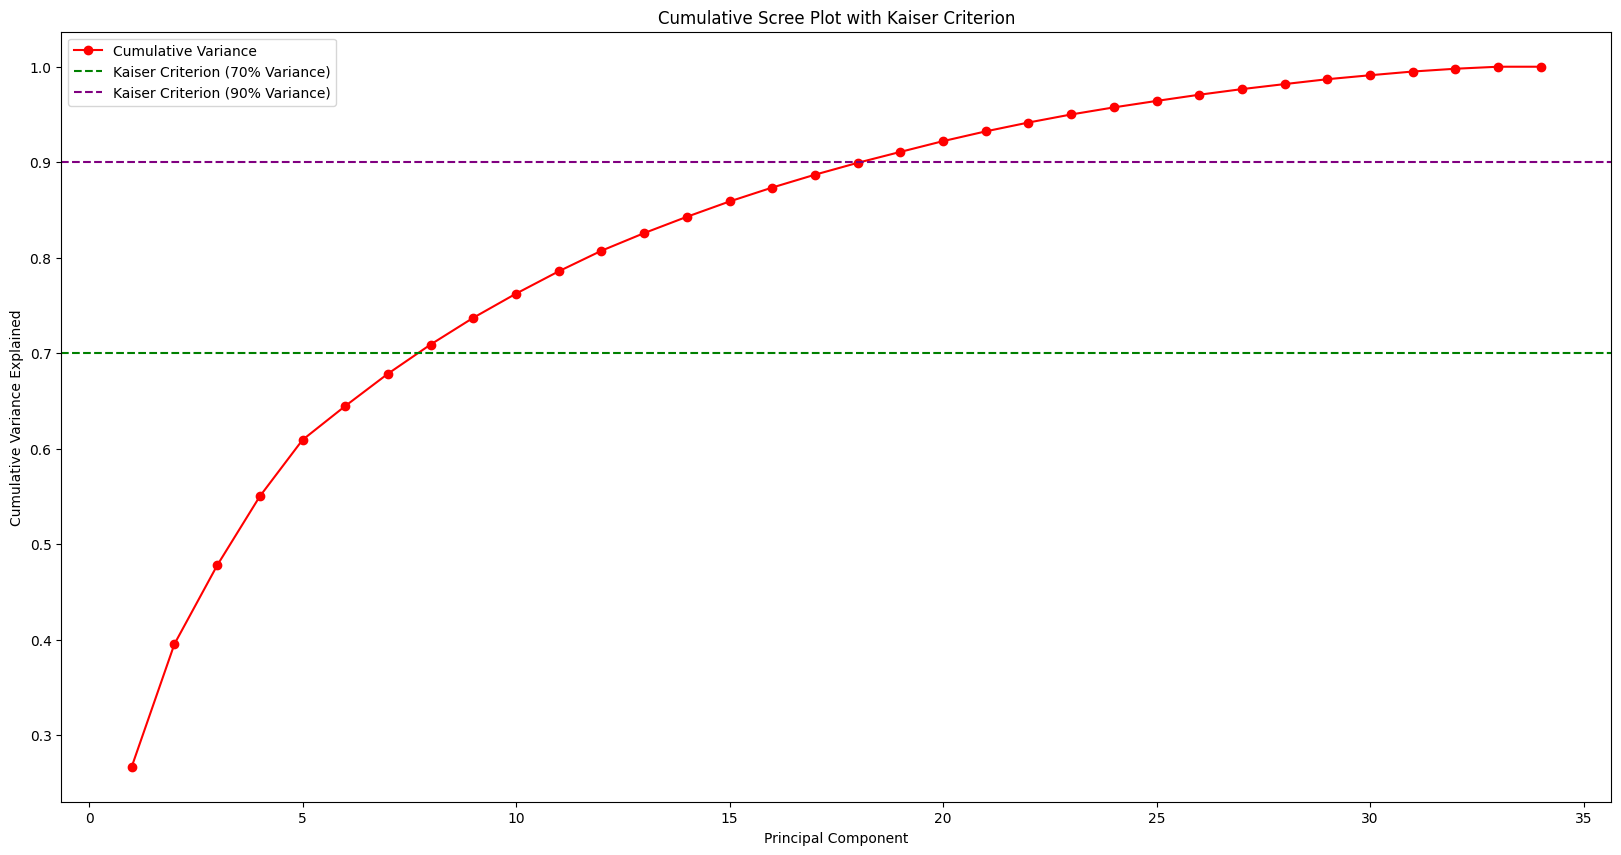

Selected number of PCA components (70% Kaiser Criterion): 8
Selected number of PCA components (90% Kaiser Criterion): 19


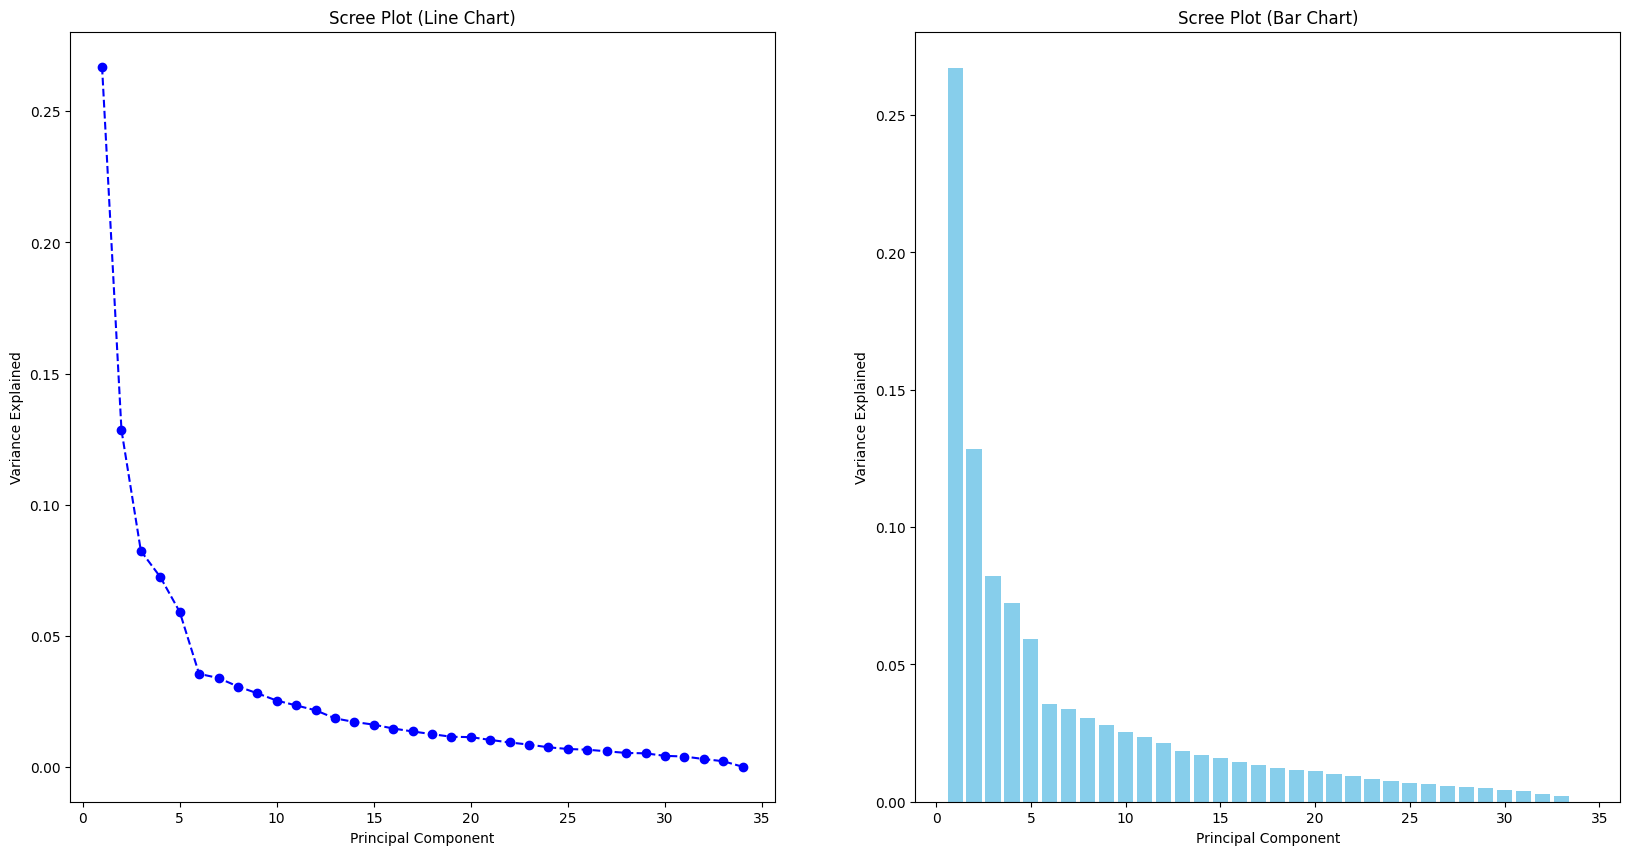

Selected number of PCA components: 8


In [ ]:
# Run PCA (if not already done) 
pca = PCA()  # Create a PCA model instance
X_pca = pca.fit_transform(X_scaled)  # Fit PCA on normalized data and transform it

# Calculate explained and cumulative variance ratios
explained_variance = pca.explained_variance_ratio_  # Variance explained by each component
cumulative_variance = np.cumsum(explained_variance)  # Cumulative variance explained

# Plot Cumulative Scree Plot with Kaiser Criterion (70% and 90%)
plt.figure(figsize=(20, 10))

# Plot cumulative variance curve
plt.plot(range(1, len(cumulative_variance) + 1),
         cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Variance')

# Add horizontal lines for Kaiser Criteria (70% and 90%)
plt.axhline(y=0.7, color='g', linestyle='--', label='Kaiser Criterion (70% Variance)')
plt.axhline(y=0.9, color='purple', linestyle='--', label='Kaiser Criterion (90% Variance)')

# Configure plot details
plt.title('Cumulative Scree Plot with Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

# Determine number of components based on cumulative variance 
n_components_pca_70 = np.argmax(cumulative_variance >= 0.7) + 1  # Number of components covering ≥70% variance
n_components_pca_90 = np.argmax(cumulative_variance >= 0.9) + 1  # Number of components covering ≥90% variance

print("Selected number of PCA components (70% Kaiser Criterion):", n_components_pca_70)
print("Selected number of PCA components (90% Kaiser Criterion):", n_components_pca_90)

# Scree Plot (Line and Bar Charts)
# Re-run PCA to visualize variance explained by each component

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained and cumulative variance again
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create two types of scree plots: line and bar charts
plt.figure(figsize=(20, 10))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot (Line Chart)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Bar plot
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance) + 1),
        explained_variance, color='skyblue')
plt.title('Scree Plot (Bar Chart)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

#  Select number of PCA components
# Keep enough components to preserve 70–90% of total variance
n_components_pca = np.argmax(cumulative_variance >= 0.7) + 1
print("Selected number of PCA components:", n_components_pca)

# Apply dimensionality reduction with selected components
pca = PCA(n_components=n_components_pca)
X_pca_reduced = pca.fit_transform(X_scaled)  # Reduced feature set after PCA

<h1>Linear Discriminant Analysis (LDA)<h1>
<h5>Reduce dimensions using LDA. Since the dataset has two classes, we select one component.<h5>

C:\Users\Hossein\AppData\Local\Temp\ipykernel_7988\3351749682.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_lda_reduced, np.zeros_like(X_lda_reduced), c=y, cmap='viridis', edgecolor='k', s=50) # رسم نقاط داده‌ها در محور کاهش‌یافته


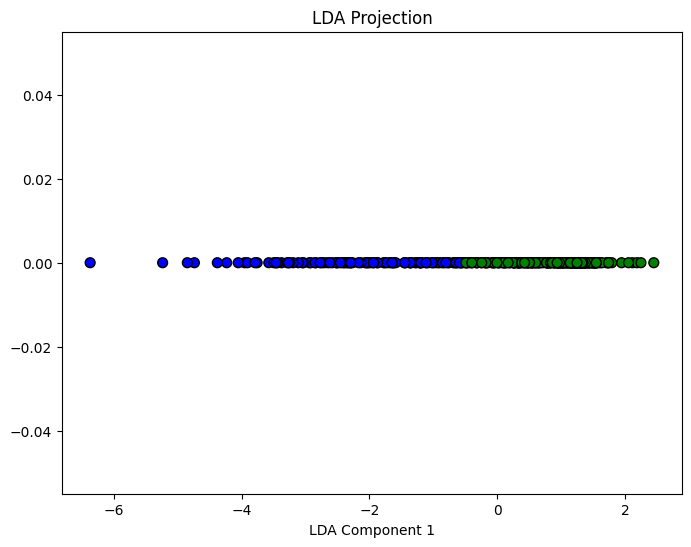

In [ ]:
lda = LDA(n_components=1)  # Choose 1 component for 2-class data
X_lda_reduced = lda.fit_transform(X_scaled, y)  # Fit LDA on normalized data and transform it

# Plot LDA Projection
plt.figure(figsize=(8, 6))
plt.scatter(
    X_lda_reduced,                # LDA-transformed data (1D)
    np.zeros_like(X_lda_reduced), # Plot on a horizontal line (y=0)
    c=y,                          # Color points by their class label
    cmap='viridis',               # Colormap
    edgecolor='k',                # Black edge around points
    s=50                          # Marker size
)
plt.title('LDA Projection')      # Chart title
plt.xlabel('LDA Component 1')    # X-axis label
plt.show()                       # Display the plot

<h1>K-means Clustering<h1>
<h5>Cluster the PCA-reduced data using the K-means algorithm and evaluate cluster quality with Silhouette Score.<h5>

K-means: k=2, Silhouette Score=0.3300726386841599
K-means: k=3, Silhouette Score=0.3348491982084911
K-means: k=4, Silhouette Score=0.3159729504646551
K-means: k=5, Silhouette Score=0.348029297669911
K-means: k=6, Silhouette Score=0.2862297309423726
Best number of clusters for K-means: 5


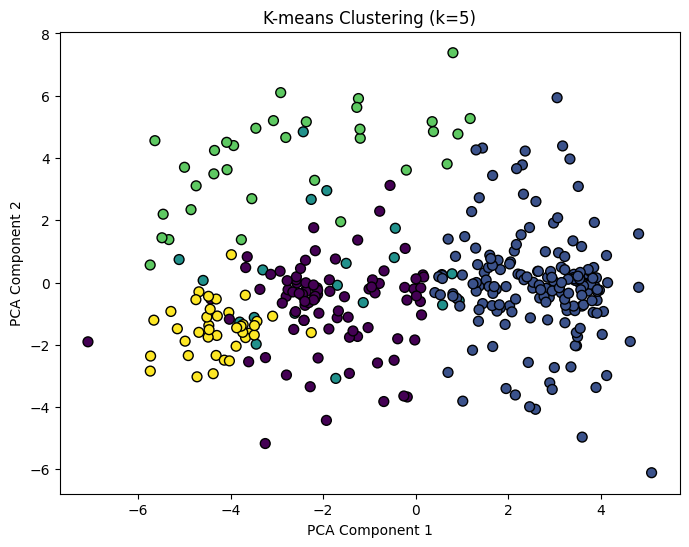

In [ ]:
silhouette_scores_kmeans = []  # List to store silhouette scores for different k

# --- Test K values from 2 to 6 ---
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)       # Initialize K-means with k clusters
    cluster_labels = kmeans.fit_predict(X_pca_reduced)  # Assign cluster labels to data
    score = silhouette_score(X_pca_reduced, cluster_labels)  # Compute silhouette score
    silhouette_scores_kmeans.append(score)              # Store the score
    print(f"K-means: k={k}, Silhouette Score={score}")  # Print silhouette score for each k

# --- Select the best number of clusters based on highest silhouette score ---
best_k = np.argmax(silhouette_scores_kmeans) + 2  # +2 because range starts at 2
print("Best number of clusters for K-means:", best_k)

# --- Run K-means with the best number of clusters and visualize results ---
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_reduced)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_reduced[:, 0], X_pca_reduced[:, 1],  # Plot first two PCA components
    c=cluster_labels,                          # Color by cluster label
    cmap='viridis',                             # Colormap
    s=50,                                       # Marker size
    edgecolor='k'                               # Black edges
)
plt.title(f'K-means Clustering (k={best_k})')  # Plot title with selected cluster count
plt.xlabel('PCA Component 1')                  # X-axis label
plt.ylabel('PCA Component 2')                  # Y-axis label
plt.show()                                     # Display the plot

<h1>Hierarchical (Agglomerative) Clustering<h1>
<h5>Perform hierarchical clustering on the PCA-reduced data and evaluate clusters.<h5>

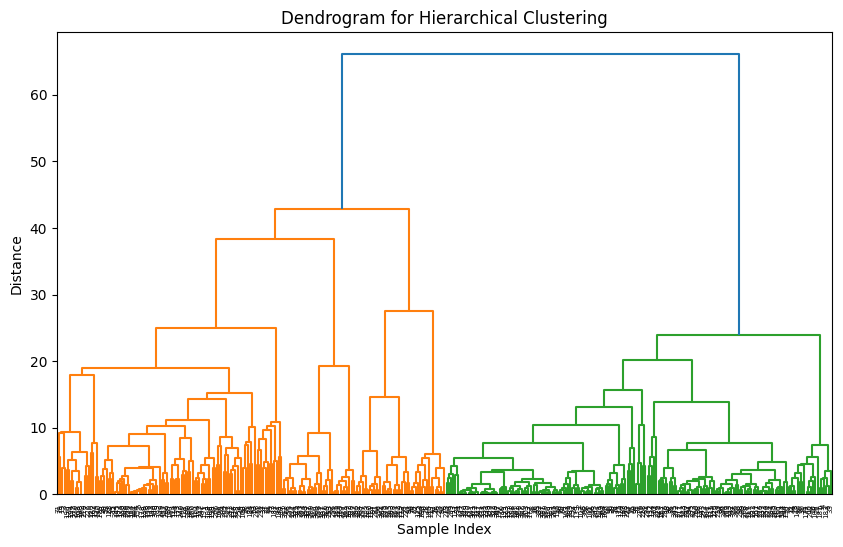

Hierarchical Clustering: k=2, Silhouette Score=0.29703540382545757
Hierarchical Clustering: k=3, Silhouette Score=0.32705495420180186
Hierarchical Clustering: k=4, Silhouette Score=0.3471329083830169
Hierarchical Clustering: k=5, Silhouette Score=0.3092790707366591
Hierarchical Clustering: k=6, Silhouette Score=0.3182833799113595
Best number of clusters for Hierarchical Clustering: 4


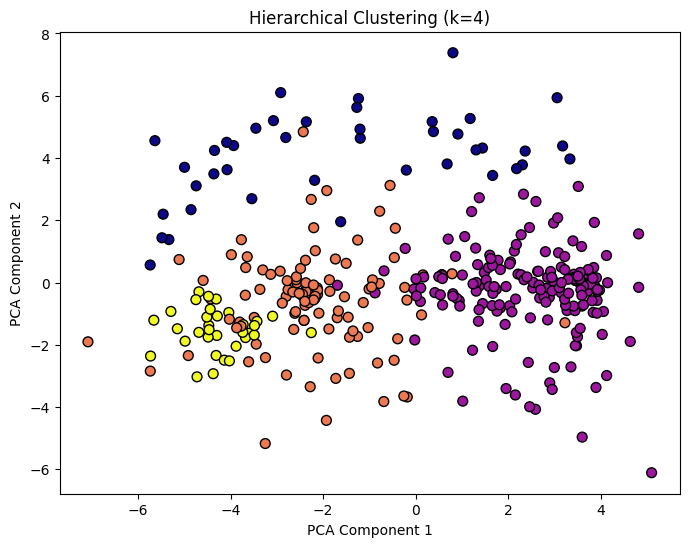

In [ ]:
# Create linkage matrix for dendrogram
linked = linkage(X_pca_reduced, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',        # Dendrogram from top
    distance_sort='descending',
    show_leaf_counts=False    # Do not show leaf counts
)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Evaluate hierarchical clustering using Silhouette Score
silhouette_scores_hierarchical = []  # Store silhouette scores for k = 2 to 6
for k in range(2, 7):
    hierarchical = AgglomerativeClustering(n_clusters=k)        # Initialize hierarchical model
    cluster_labels = hierarchical.fit_predict(X_pca_reduced)    # Assign cluster labels
    score = silhouette_score(X_pca_reduced, cluster_labels)     # Compute silhouette score
    silhouette_scores_hierarchical.append(score)                # Store score
    print(f"Hierarchical Clustering: k={k}, Silhouette Score={score}")

# Determine best number of clusters
best_k_hierarchical = np.argmax(silhouette_scores_hierarchical) + 2  # +2 because range starts at 2
print("Best number of clusters for Hierarchical Clustering:", best_k_hierarchical)

# Visualize hierarchical clustering results
hierarchical = AgglomerativeClustering(n_clusters=best_k_hierarchical)
cluster_labels = hierarchical.fit_predict(X_pca_reduced)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_reduced[:, 0], X_pca_reduced[:, 1],  # First two PCA components
    c=cluster_labels,                           # Color by cluster label
    cmap='plasma',                              # Colormap
    s=50,                                       # Marker size
    edgecolor='k'                               # Black edges
)
plt.title(f'Hierarchical Clustering (k={best_k_hierarchical})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()